In [1]:
import sys
sys.path.append('..')
from src.data_loader import download_stock_data, get_data_info
from src.strategy import calculate_sma, generate_signals

#other esssential libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14,7)


In [2]:
ticker = 'RELIANCE.NS'
print(f" downloading {ticker} stock data...")
df = download_stock_data(ticker, period="5y", interval ="1d")


 downloading RELIANCE.NS stock data...


Succesfully downloaded 1239 rows of data

Date range: 2021-01-25 to 2026-01-23


In [3]:
get_data_info(df)


Data Information
Total rows:1239
Date range: 2021-01-25 to 2026-01-23

 columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

 Missing values: Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
                                 Open        High         Low       Close  \
Date                                                                        
2021-01-25 00:00:00+05:30  922.709913  922.709913  876.029160  880.110046   
2021-01-27 00:00:00+05:30  872.855171  872.855171  856.078208  859.252197   
2021-01-28 00:00:00+05:30  852.518805  872.084404  847.916497  850.886475   
2021-01-29 00:00:00+05:30  858.934788  867.459306  829.779159  835.197693   
2021-02-01 00:00:00+05:30  843.110097  863.786543  837.940970  859.388306   

                             Volume  Dividends  Stock Splits  
Date                                                          
2021-01-25 00:00:00+05:

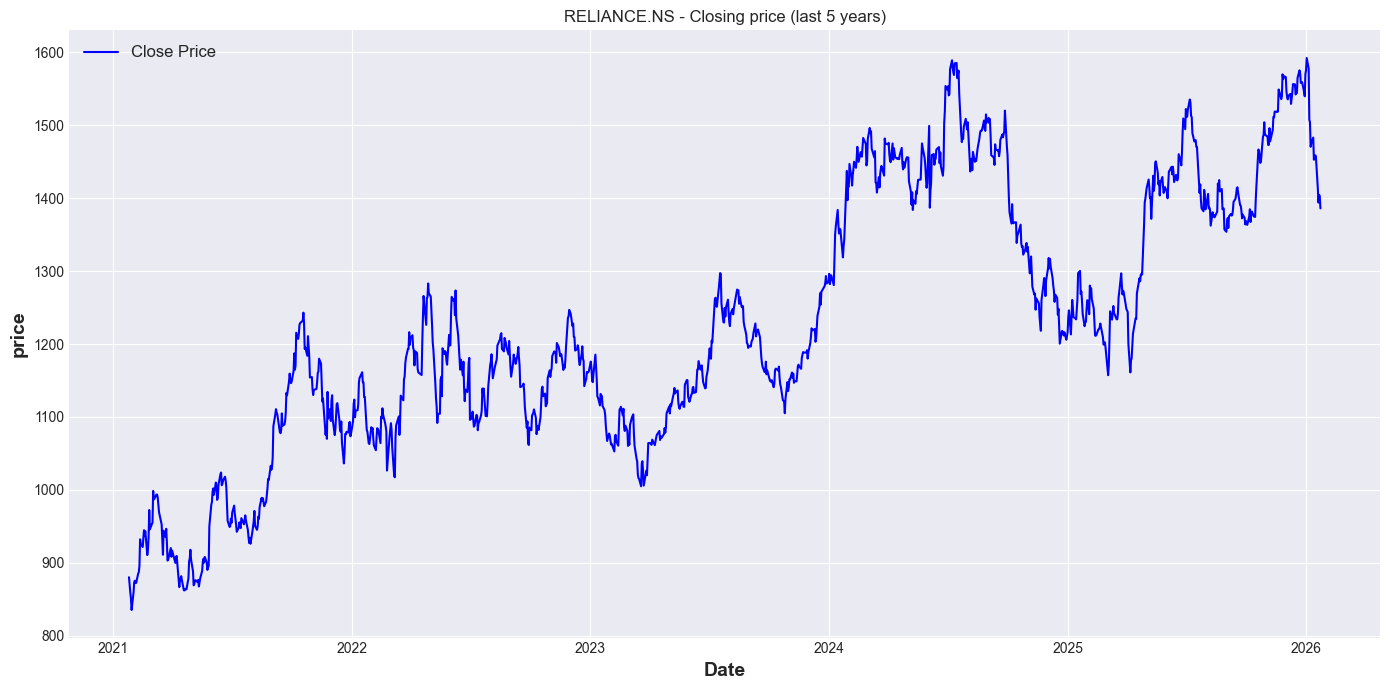

In [4]:
plt.plot(df.index, df['Close'], label = 'Close Price', color = 'blue', linewidth = '1.5')
plt.title(f"{ticker} - Closing price (last 5 years)")
plt.xlabel("Date", fontsize = 14, fontweight = 'bold')
plt.ylabel("price", fontsize = 14, fontweight = 'bold')
plt.legend(fontsize = 12)
plt.tight_layout()
plt.grid(True)
plt.show()

In [5]:
df_SMA = calculate_sma(df, short_window=20, long_window=50)
df_SMA[['Close','SMA_20', 'SMA_50']].tail(10)

Calculated SMA 20 and SMA 50


,Close,SMA_20,SMA_50
Date,,,
2026-01-12 00:00:00+05:30,1483.199951,1543.029993,1534.560000
2026-01-13 00:00:00+05:30,1452.800049,1538.554993,1534.154001
2026-01-14 00:00:00+05:30,1458.800049,1534.274994,1533.868003
2026-01-15 00:00:00+05:30,1458.800049,1529.994995,1533.122004
2026-01-16 00:00:00+05:30,1457.900024,1524.634998,1532.720005
2026-01-19 00:00:00+05:30,1413.599976,1516.544995,1531.206003
2026-01-20 00:00:00+05:30,1394.000000,1507.709998,1529.218003
2026-01-21 00:00:00+05:30,1404.599976,1500.029999,1527.080002
2026-01-22 00:00:00+05:30,1402.500000,1492.245001,1524.912002


In [6]:
df_signals = generate_signals(df_SMA)

df_signals[['Close','SMA_20','SMA_50','Position','Signal']].tail(10)

Buy signals:16
Sell signals:16


,Close,SMA_20,SMA_50,Position,Signal
Date,,,,,
2026-01-12 00:00:00+05:30,1483.199951,1543.029993,1534.560000,1,0.0
2026-01-13 00:00:00+05:30,1452.800049,1538.554993,1534.154001,1,0.0
2026-01-14 00:00:00+05:30,1458.800049,1534.274994,1533.868003,1,0.0
2026-01-15 00:00:00+05:30,1458.800049,1529.994995,1533.122004,0,-1.0
2026-01-16 00:00:00+05:30,1457.900024,1524.634998,1532.720005,0,0.0
2026-01-19 00:00:00+05:30,1413.599976,1516.544995,1531.206003,0,0.0
2026-01-20 00:00:00+05:30,1394.000000,1507.709998,1529.218003,0,0.0
2026-01-21 00:00:00+05:30,1404.599976,1500.029999,1527.080002,0,0.0
2026-01-22 00:00:00+05:30,1402.500000,1492.245001,1524.912002,0,0.0


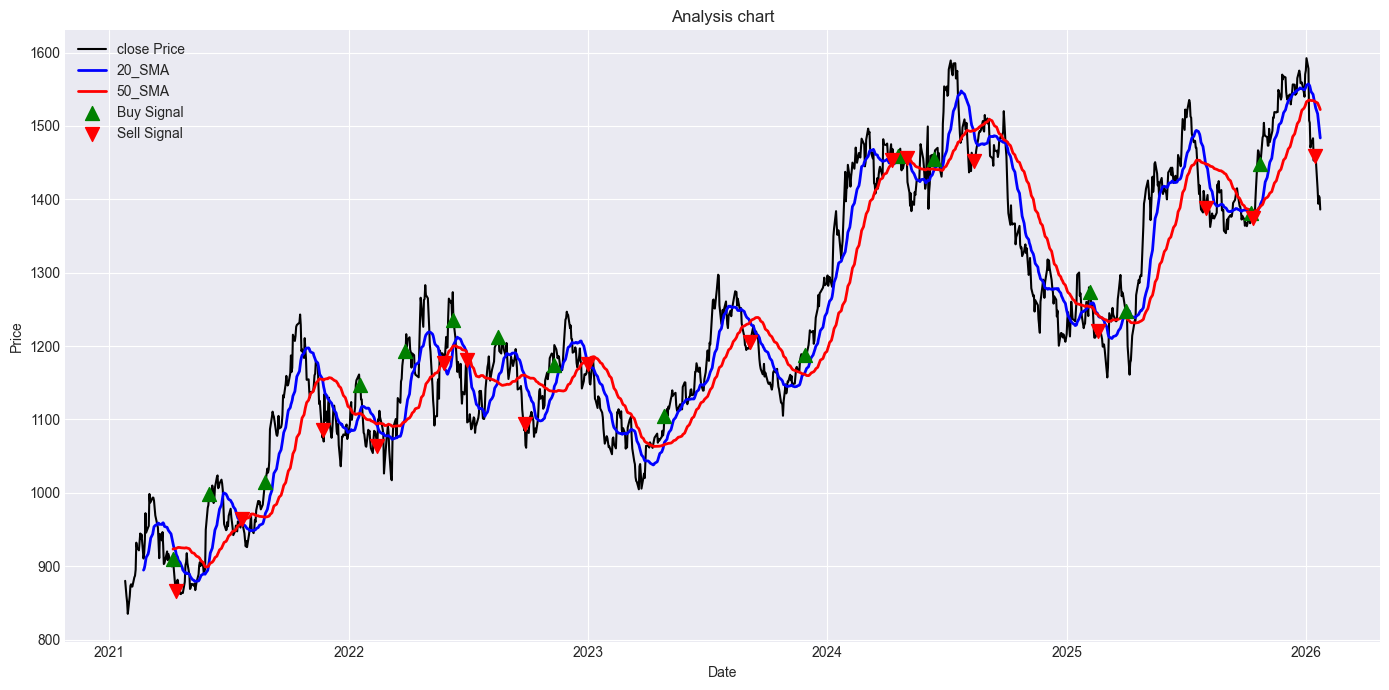

In [9]:
fig, ax = plt.subplots(figsize = (14,7))

ax.plot(df_signals['Close'], linewidth =1.5, label = 'close Price', color ='black')
ax.plot(df_signals['SMA_20'], linewidth = 2, label = '20_SMA', color = 'blue')
ax.plot(df_signals['SMA_50'], linewidth = 2, label = '50_SMA', color = 'red')

buy_signals = df_signals[df_signals['Signal'] == 1]
sell_signals = df_signals[df_signals['Signal']==-1]

ax.scatter(buy_signals.index, buy_signals['Close'], marker= '^',color = 'green', s= 100, label = 'Buy Signal', zorder = 5)
ax.scatter(sell_signals.index, sell_signals['Close'], marker = 'v', color = 'red', s = 100, zorder =5, label = 'Sell Signal')
ax.set_title("Analysis chart")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
plt.tight_layout()
plt.show()